# Netflix Movies and TV Shows Clustering



# Description
The Netflix Movies and TV Shows Clustering project involves exploratory data analysis (EDA) and clustering analysis on a dataset of Netflix content available up to January 16, 2021. The dataset includes movies and TV shows with attributes like director, cast, country, rating, genre, and description. The project aims to extract insights and patterns from the dataset, and cluster the content based on textual attributes to understand the categorization and trends.

# Objective
The objective of this project is to analyze the Netflix dataset to uncover patterns and trends in the content available on the platform. Additionally, the project aims to perform clustering to group similar movies and TV shows based on their attributes, providing a better understanding of the content distribution and characteristics.

# Attribute Information


1.   show_id : Unique ID for every Movie / Tv Show

2.   type : Identifier - A Movie or TV Show

3.   title : Title of the Movie / Tv Show

4.   director : Director of the Movie

5.   cast : Actors involved in the movie / show

6.   country : Country where the movie / show was produced

7.   date_added : Date it was added on Netflix

8.   release_year : Actual Releaseyear of the movie / show

9.   rating : TV Rating of the movie / show

10.  duration : Total Duration - in minutes or number of seasons

11.  listed_in : Genere

12.  description: The Summary description

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import warnings
import plotly.graph_objects as go
import plotly.express as px 
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import Dataset

In [2]:
# Load Dataset
df_1st = pd.read_csv('C:/Projects/Netflix-Movies-and-TV-Shows-Clustering-main/Netflix_tv_shows_data.csv')
df=df_1st.copy()

In [3]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

There are no duplicated values.

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* There are many missing values in director, cast, country, date_added, and rating columns.

In [8]:
# Count missing values in the dataset
print(df.isnull().values.sum())

3631


* Total missing values in dataset.

<Axes: >

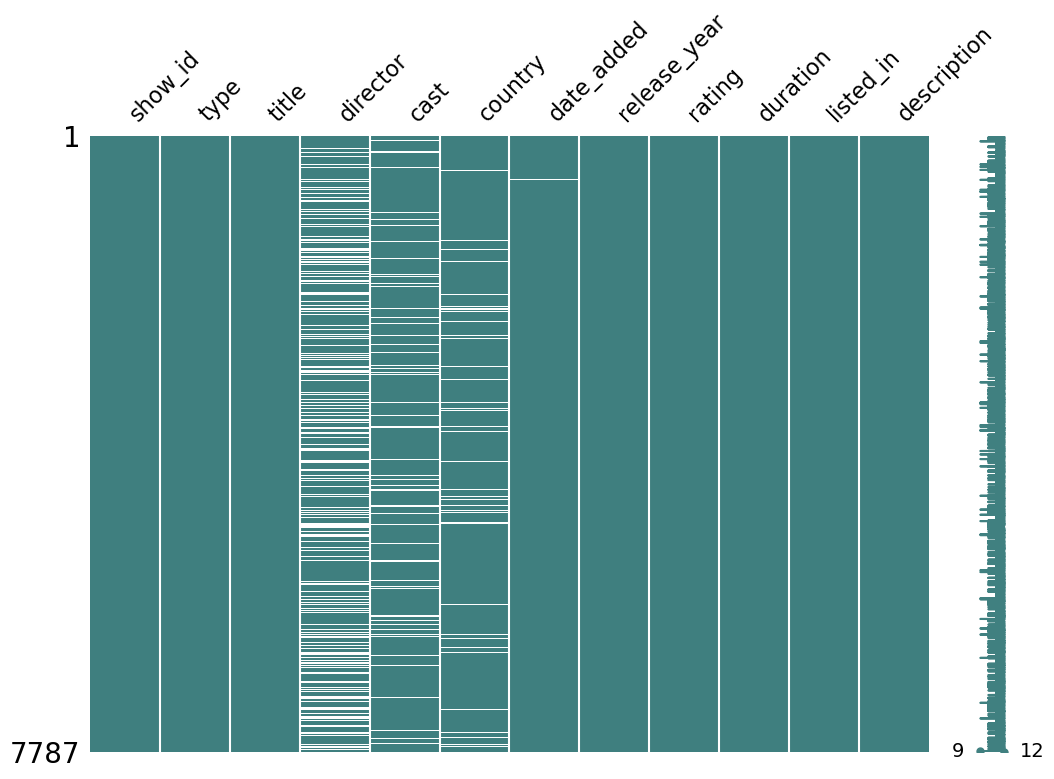

In [9]:
# Visualizing the missing values
msno.matrix(df, figsize=(12,8),color=(0.25,0.5,0.5))

* There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

## *Understanding Variables*

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

* Unique values in each variable.

## ***Data Wrangling***

In [13]:
#Handling the missing values 
df['country'].fillna('unknow', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['director'].fillna('unknown', inplace=True)
df.dropna(axis=0, inplace = True)
df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)

* Missing values in variable like country, cast, director is replace with 'Unknown' and the missing values in column release year is filled using mode.

In [14]:
df.shape

(7770, 12)

* We have successfully handled all the missing values in the dataset

In [15]:
#Typecasting date_added to datetime format

df["date_added"] = pd.to_datetime(df['date_added'])

* Converted the date added variable from string into datetime formate.

In [16]:
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

* The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [17]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

* Added new attributes month and year of date added

In [18]:
a= df.copy()

In [19]:
a['listed_in']=a.listed_in.apply(lambda x: x.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

* Genres are extracted from the variable listed in.

In [20]:
replacing_genrs={'International TV Shows': '_',
                 'TV Dramas': 'Drama',
                 'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                 'Dramas': 'Drama',
                 'International Movies': '_', 
                 'Horror Movies': 'Horror',
                 'Action & Adventure': 'ActionAdventure',
                 'Independent Movies': '_',
                 'Sci-Fi & Fantasy': 'SciFiFantasy',
                 'TV Mysteries': 'Mysteries', 
                 'Thrillers':'Thrillers',
                 'Crime TV Shows': 'Crime', 
                 'Docuseries':'Documentary',
                 'Documentaries':'Documentary',
                 'Sports Movies':'Sport',
                 'Comedies':'Comedy',
                 'Anime Series':'Anime',
                 'Reality TV':'Reality',
                 'TV Comedies':'comedy',
                 'Romantic Movies':'Romantic',
                 'Romantic TV Shows':'Romantic',
                 'Science & Nature TV':'Science',
                 'Movies':'_',
                'British TV Shows':'_', 
                 'Korean TV Shows':'_',
                 'Music & Musicals':'Musical',
                'LGBTQ Movies':'LGBTQ', 
                 'Faith & Spirituality': 'Spirituality',
                 "Kids' TV": 'Kids',
                 'TV Action & Adventure': 'ActionAdventure',
                 'Spanish-Language TV Shows':'_',
                'Children & Family Movies':'Family', 
                 'TV Shows':'_',
                 'Classic Movies':'classic',
                 'Cult Movies':'cult',
                 'TV Horror':'Horror',
                 'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                 'Teen TV Shows': 'Teen',
                 'Stand-Up Comedy':'Comedy', 
                 'Anime Features':'Anime',
                 'TV Thrillers':'Thriller',
                 'Classic & Cult TV':'Classic, Cult'}

* Re-defined the genres accordingly.

In [21]:
def genre_replace( x, replacing_genrs=replacing_genrs):

 new_text=[]

 for word in(x['listed_in']):
  if word in replacing_genrs:
   if '_'not in replacing_genrs[word]:
    new_text.append(replacing_genrs[word])
  else:
      print(word, 'not present in dictionary')

 return(', '.join(new_text))
  
df['Genres']= a.apply(lambda x: genre_replace(x),axis=1)
df['Genres']= df['Genres'].apply(lambda x: x.split(', '))

In [22]:
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mysteries',
       'Thrillers', 'Crime', 'Documentary', 'Sport', 'Comedy', 'Anime',
       'Reality', 'comedy', 'Romantic', 'Science', '', 'Musical', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'classic', 'cult', 'TalkShow',
       'Teen', 'Thriller', 'Classic', 'Cult'], dtype=object)

* TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

In [23]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan      unknown   
7785   s7786  TV Show                    Zumbo's Just Desserts      unknown   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                            unknown   

                                                country  release_year rating  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   
7783                                              India          2015  TV-14   
7784                                             unknow          2019  TV-MA   
7785                                          Australia          2019  TV-PG   
7786              United Kingdom, Canada, United States          2019  TV-MA   

      duration                                          listed_in  \
7782    99 min                       Dramas, International Movies   
7783   111 min     Dramas, International Movies, Music & Musicals   
7784    44 min  Documentaries, International Movies, Music & M...   
7785  1 Season                 International TV Shows, Reality TV   
7786    90 min                    Documentaries, Music & Musicals   

                                            description  month_added  \
7782  When Lebanon's Civil War deprives Zozo of his ...           10   
7783  A scrappy but poor boy worms his way into a ty...            3   
7784  In this documentary, South African rapper Nast...            9   
7785  Dessert wizard Adriano Zumbo looks for the nex...           10   
7786  This documentary delves into the mystique behi...            3   

      year_added                  Genres  
7782        2020                 [Drama]  
7783        2019        [Drama, Musical]  
7784        2020  [Documentary, Musical]  
7785        2020               [Reality]  
7786        2020  [Documentary, Musical]

In [24]:
# Splitting the duration column, and changing the datatype to integer
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
df.duration.dtype

dtype('int64')

* Converted the datatype of variable duration from string into integer.

<Axes: xlabel='rating', ylabel='count'>

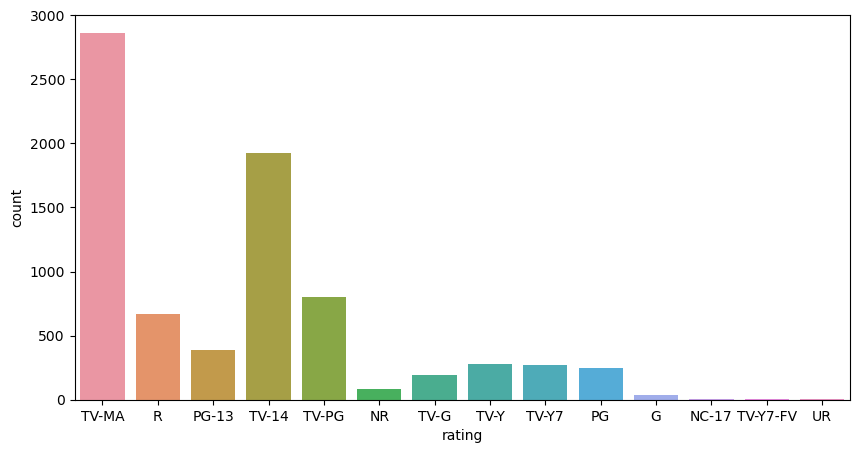

In [26]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

* Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [27]:
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['rating'].replace(rating_map, inplace=True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

*  Changed the values in the rating column for better understanding.

<Axes: xlabel='rating', ylabel='count'>

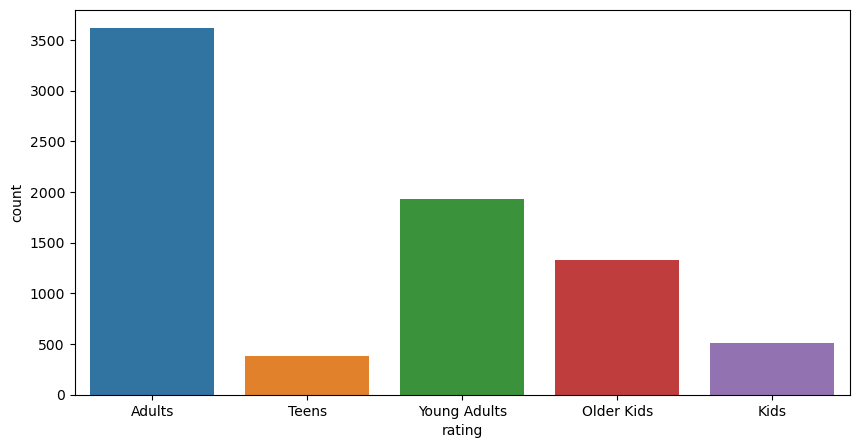

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

* Most content on Netflix is rated for Mature Audiences and over 14 years old

In [29]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year  rating  duration  \
0          2020  Adults         4   
1          2016  Adults        93   
2          2011  Adults        78   
3          2009   Teens        80   
4          2008   Teens       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  year_added  \
0  In a future where the elite inhabit an island ...            8        2020   
1  After a devastating earthquake hits Mexico Cit...           12        2016   
2  When an army recruit is found dead, his fellow...           12        2018   
3  In a postapocalyptic world, rag-doll robots hi...           11        2017   
4  A brilliant group of students become card-coun...            1        2020   

                            Genres  
0            [Drama, SciFiFantasy]  
1                          [Drama]  
2                         [Horror]  
3  [ActionAdventure, SciFiFantasy]  
4                          [Drama]

## Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate** **Analysis**

#### Movies V/S Tv shows

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

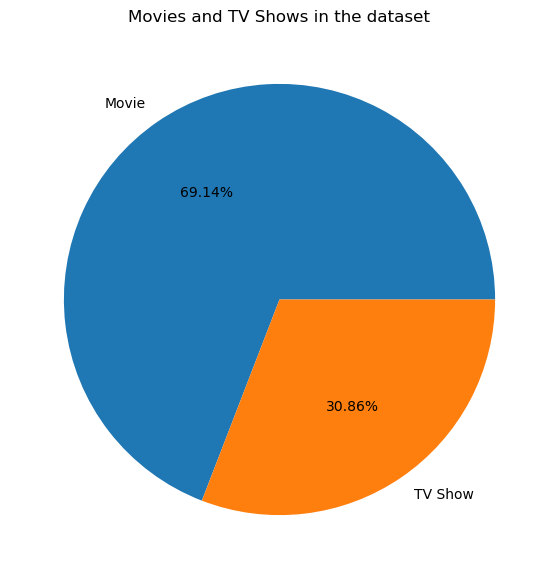

In [30]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

Netflix has a higher proportion of movies (69.14%) compared to TV shows (30.86%), indicating that there are more movies than TV shows on the platform. This information highlights the distribution of content types. Given the larger number of movies, Netflix could consider increasing the number of TV shows to create a positive business impact. This insight suggests an opportunity for growth without negatively affecting the business.

### Released year

Text(0.5, 1.0, 'distribution by released year')

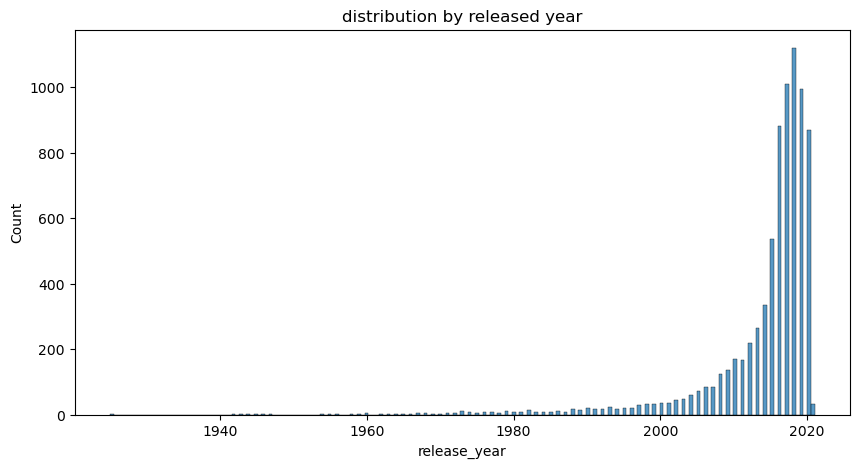

In [31]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')
     

Netflix has a larger number of new movies and TV shows compared to older ones. This observation simply visualizes the content growth on the platform over the years and does not have any negative impact on the business.

### Top 10 Directors

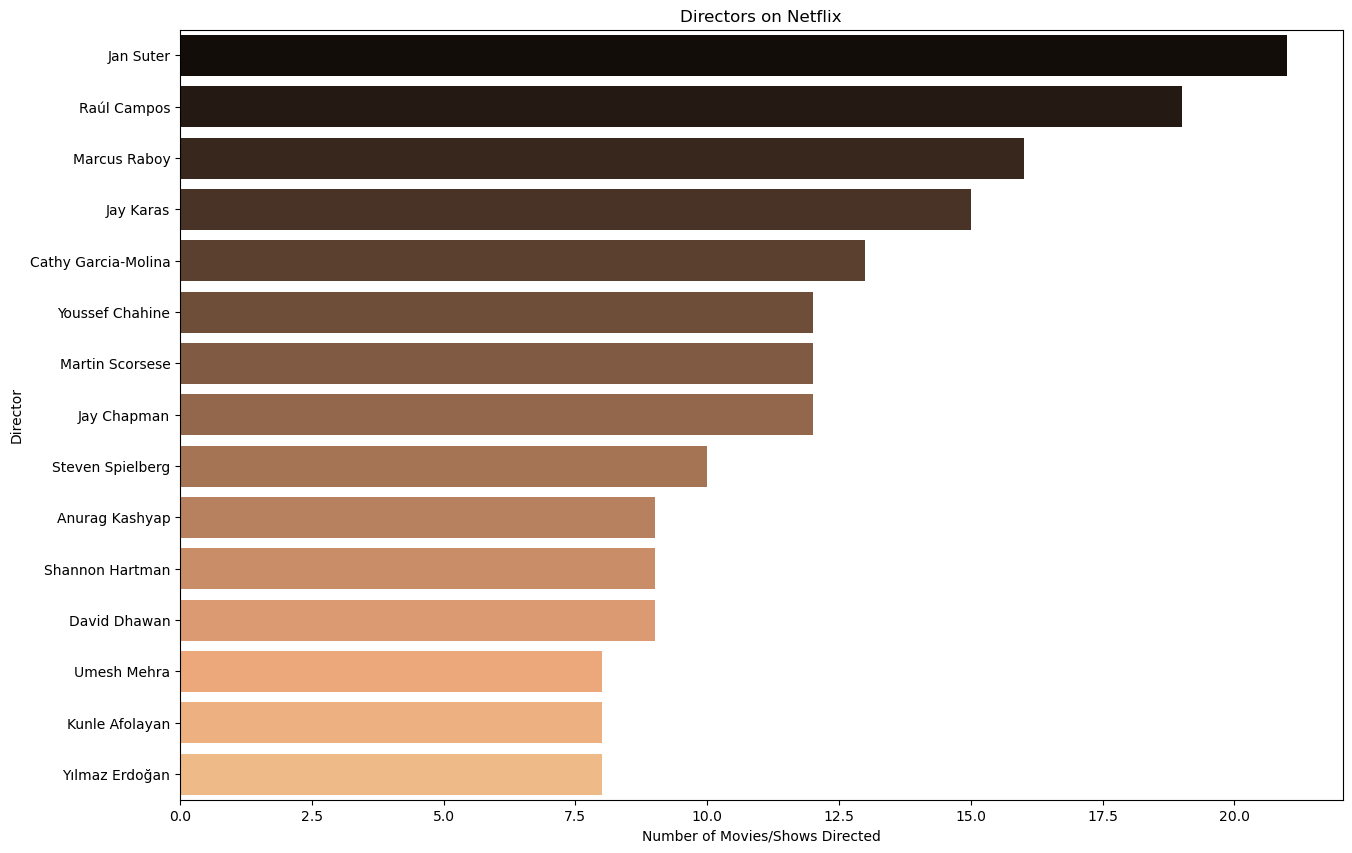

In [32]:

a=df[df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
director_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = director_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(15)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'copper')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10directors = director_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(10)['Director'].to_list()
     


Top Directors on Netflix are:

1.Jan Suter
2.Raul Campos 3.Marcus Raboy 4.Jay Karas 5.Cathy Garcia-Molina



These insights do not negatively impact the business; in fact, they can create a positive business impact. By identifying the top directors, Netflix can connect with them and potentially offer opportunities to release their movies or TV shows on the platform.

### Top 10 countries

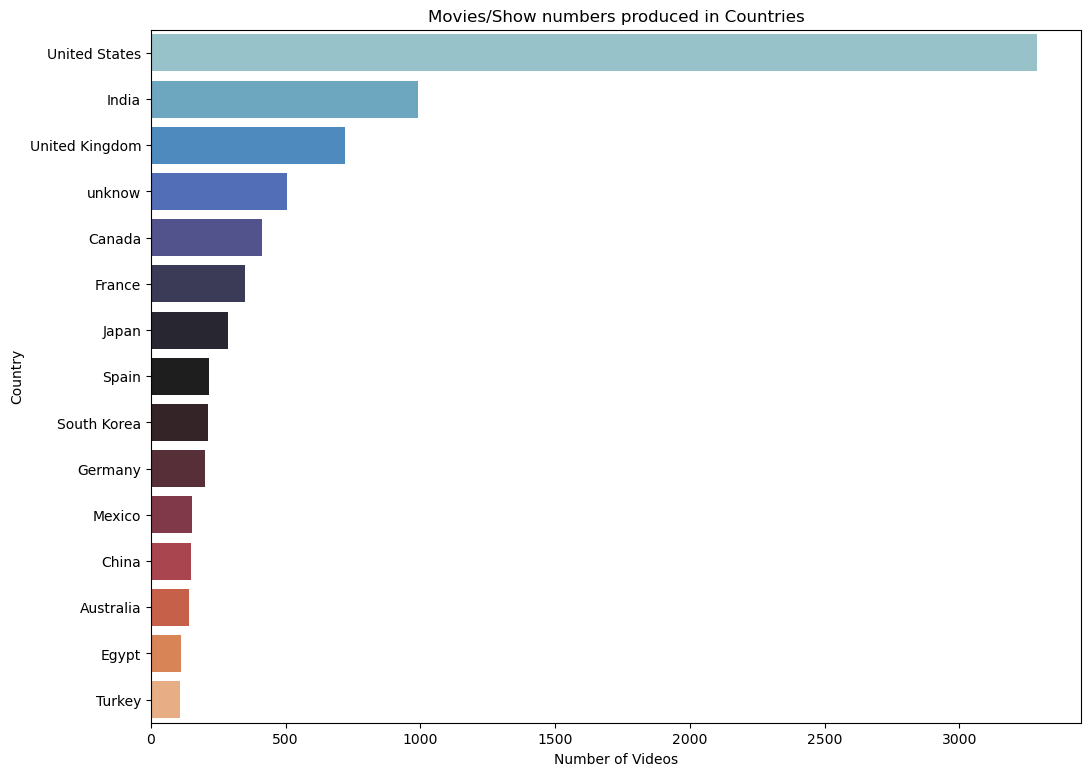

In [33]:
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(15).reset_index()
plt.figure(figsize=(12,9))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()
     

The highest number of movies and TV shows are based in the US, followed by India and the UK. Knowing which countries produce the most content can help Netflix plan its business strategy to expand in different regions based on their production rates.

#### Top 10 cast

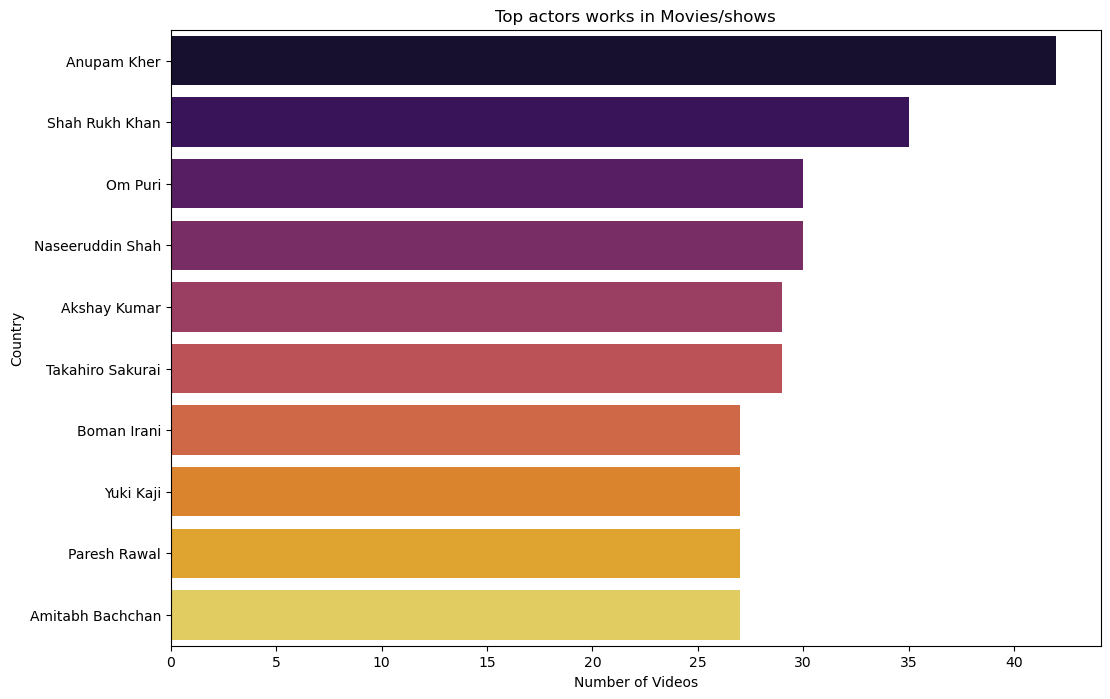

In [34]:

a= df[df.cast != 'unknown'].loc[:,['title','show_id','cast','director']].copy()
castlist = (a['cast'].to_list())

newlist=[]
for cast in castlist:
  if ',' in cast:
    a=cast.split(', ')
    newlist= newlist+ a
  else:
    newlist.append(cast)  

cast_list=pd.DataFrame({'cast':newlist, 'id':np.arange(0,len(newlist), 1)})
a=cast_list.groupby('cast').agg({'id':'count'}).sort_values('id', ascending=False).reset_index().head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='id', y='cast',data=a, palette='inferno')
plt.title('Top actors works in Movies/shows')
plt.ylabel('Country')
plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()
     

Top Actors on Netflix:

- Anupam Kher
- Shah Rukh Khan
- Naseeruddin Shah
- Om Puri
- Akshay Kumar

The bar plot reveals the top actors in Netflix movies and TV shows, highlighting their significant contribution to the platform's content. To boost its business, Netflix should consider leveraging these well-known faces in marketing campaigns and advertisements. Approaching these actors for promotional activities could enhance Netflix's visibility and appeal.

### Months

Text(0.5, 0, '')

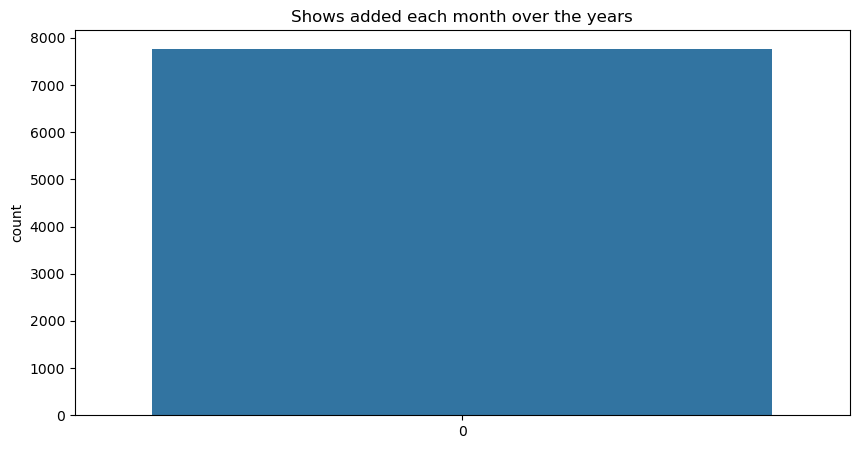

In [35]:

plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

Over the years, a greater number of shows have been added in the months of October, November, December, and January. December, being the holiday season and featuring Christmas, sees the highest content uploads. These insights can create a positive business impact, as people on holiday are more likely to watch movies or TV shows. Therefore, releasing content during holidays can be a strategic move to attract more viewers.

Text(0.5, 0, '')

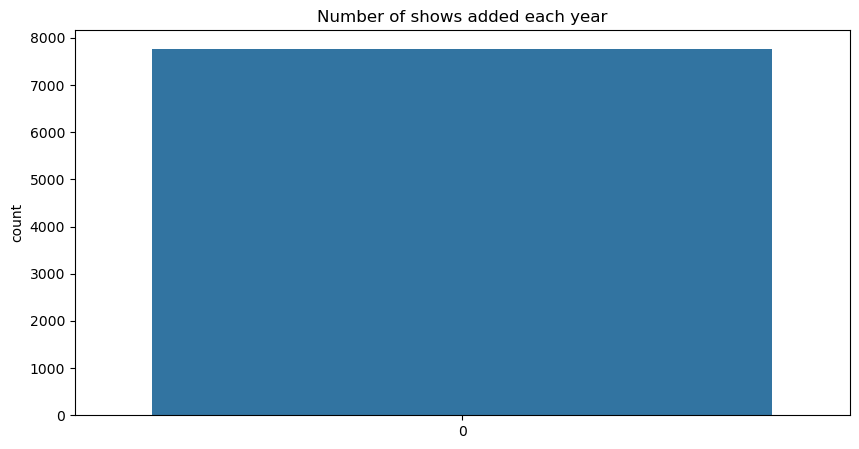

In [36]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

Netflix has continuously added more shows to its platform over the years. However, there was a decrease in the number of shows added in 2020. Additionally, since we only have Netflix data up to January 16, 2021, fewer movies were added that year. The decline in content additions in 2020 and 2021 can be attributed to the COVID-19-induced lockdowns, which halted the creation of new shows. This reduction in new content might have led to negative business growth during that period.

### Top Genres on Netflix

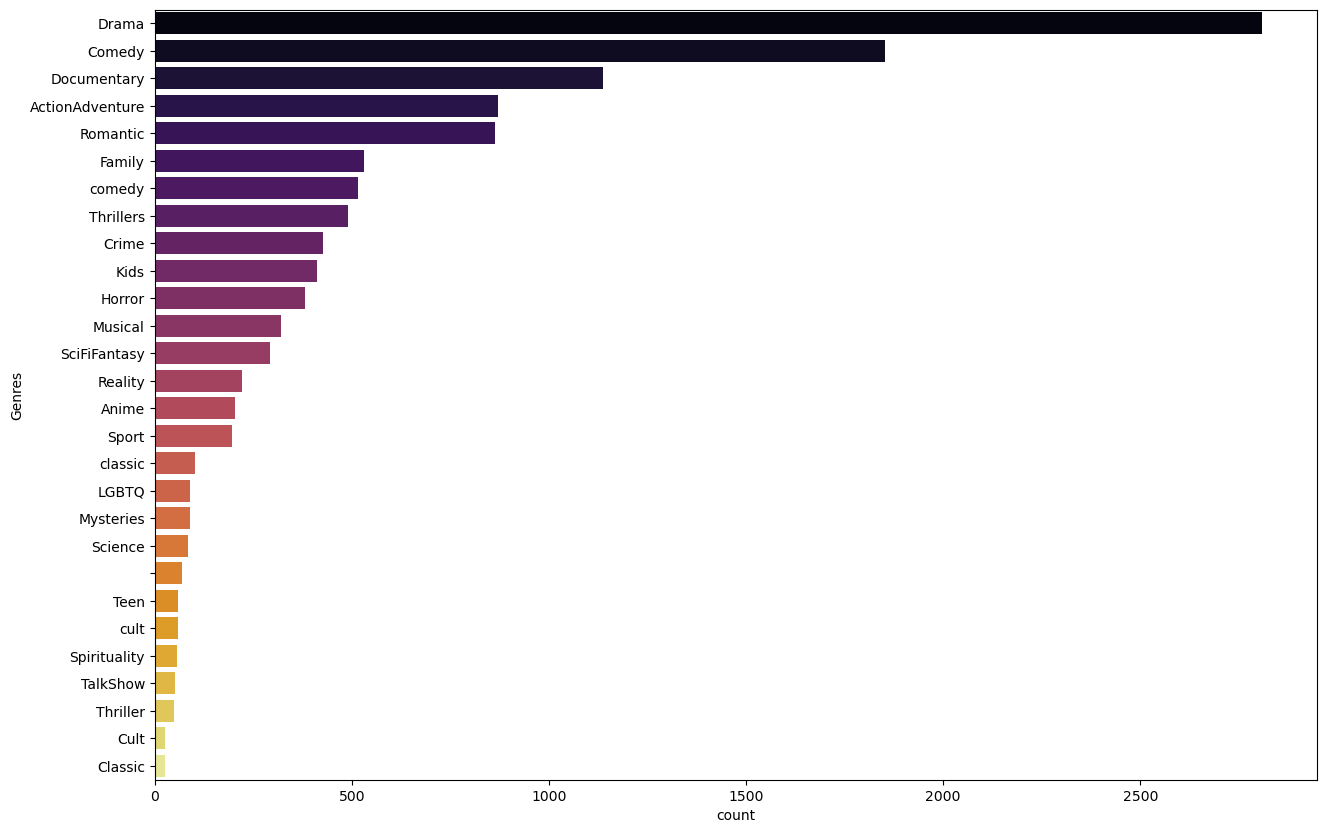

In [37]:
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')


Dramas are the most popular genre on Netflix, followed by comedies and documentaries. These three genres account for about 41% of all movies and TV shows. This proportion increases to about 82% when considering the top 10 genres. These insights can help create a positive business impact, as Netflix can focus on adding more content related to these popular genres.

### Durations

In [38]:
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [39]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

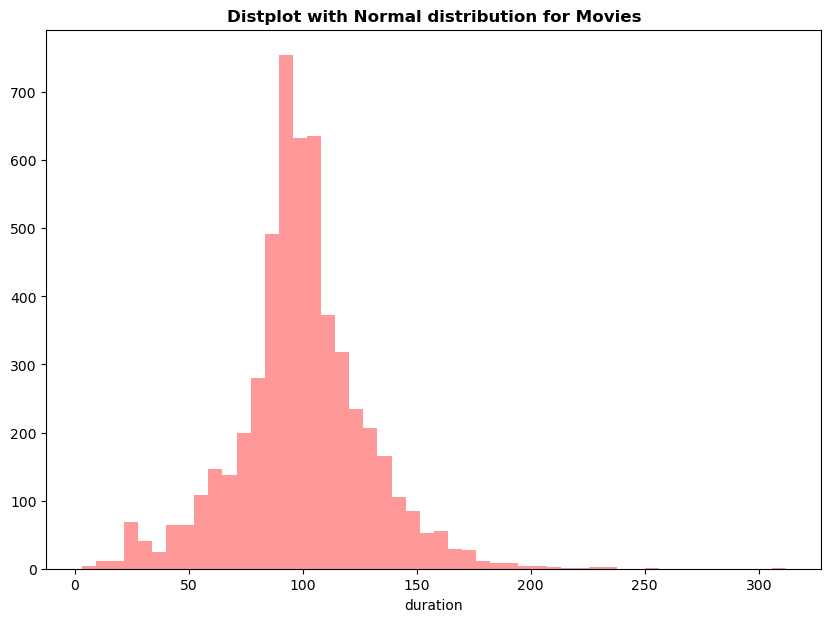

In [40]:
    
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'],kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<Axes: title={'center': 'Number of seasons per TV show distribution'}, xlabel='duration', ylabel='count'>

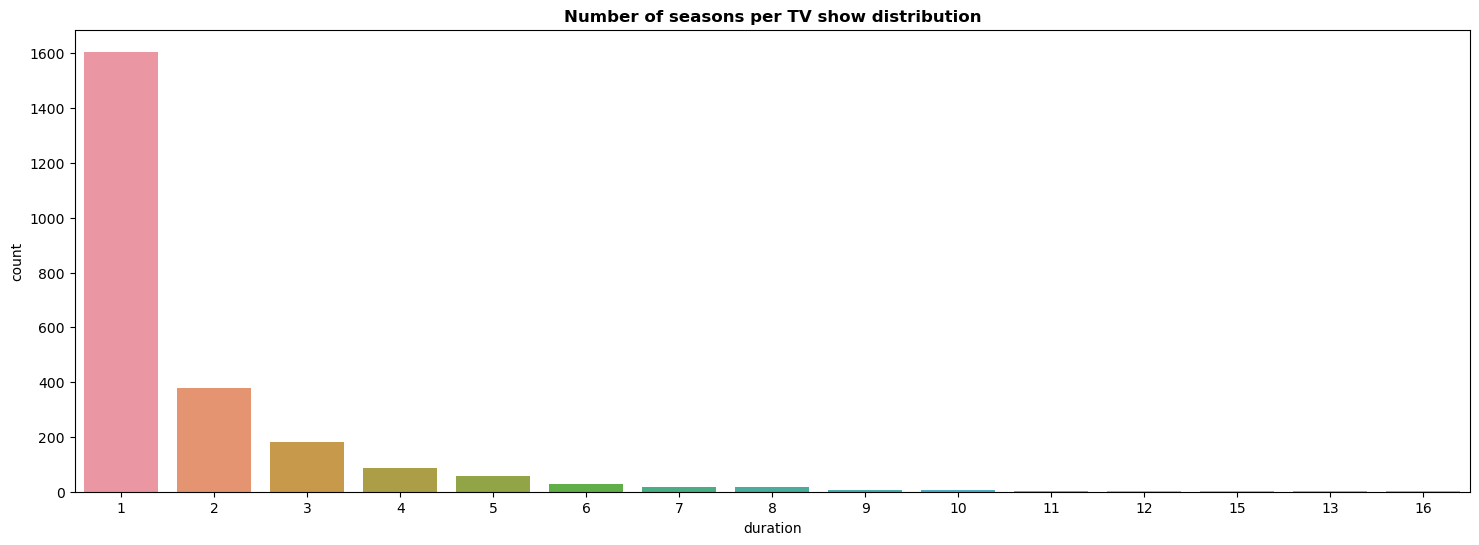

In [41]:
plt.figure(figsize=(18,6))
plt.title("Number of seasons per TV show distribution",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

The length of movies on Netflix ranges from 3 minutes to 312 minutes, and the distribution is nearly normal. Most movies fall within the duration range of 90 to 110 minutes.

For TV shows, the majority are limited to one season. While some series extend up to 16 seasons, few exceed 8 seasons. This insight suggests that focusing on movies and TV shows within the 90 to 110-minute range can maintain viewer engagement, as longer durations may deter some viewers. Additionally, the popularity of TV series indicates ongoing viewer interest, suggesting that many series are relatively new and may continue to attract viewers with subsequent seasons.

# **Bivariate** **Analysis**

####  Number of shows released each year since 2008

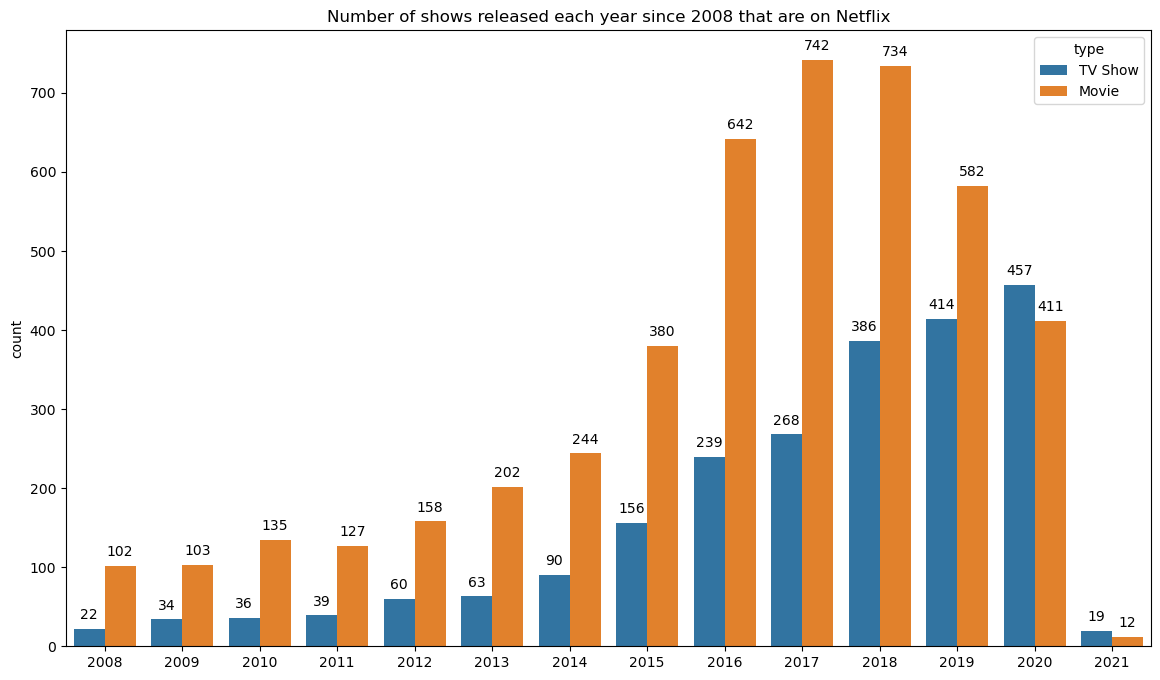

In [42]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(14,8))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

Over the years, Netflix has maintained a consistent focus on expanding its content library with more shows. While there was a decline in the number of movies added in 2020, this trend did not apply to TV shows added during the same period. This observation suggests that Netflix may be prioritizing the addition of TV series over movies, reflecting a strategic shift towards enhancing its TV content offerings.

### Month added

<Axes: xlabel='month_added', ylabel='count'>

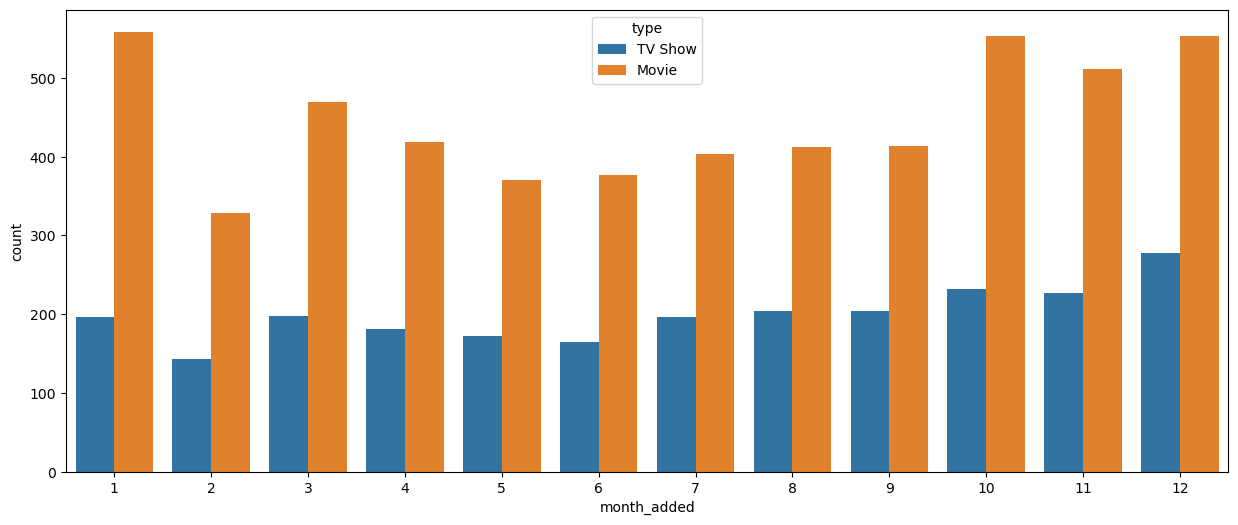

In [43]:
# Chart - 8 visualization code
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month_added', hue='type',lw=5, data=df, ax=ax)


Both TV shows and movies are preferred to be added during the months of October, November, December, and January.

#### Chart - 9

Text(0.5, 0, 'Year')

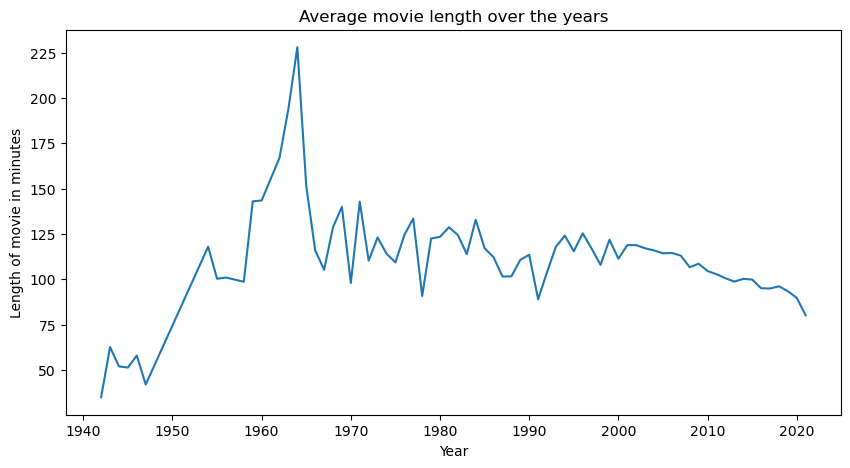

In [44]:
# Chart - 9 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')


Netflix features movies from as early as 1942, with films from the 1940s generally having a relatively short average duration, as shown in the plot. Conversely, movies from the 1960s tend to have the longest average length. Overall, the average duration of movies has shown a continuous decline since the 2000s.

#### Countries Production

In [45]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))
     

In [46]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)
     

<Axes: xlabel='country'>

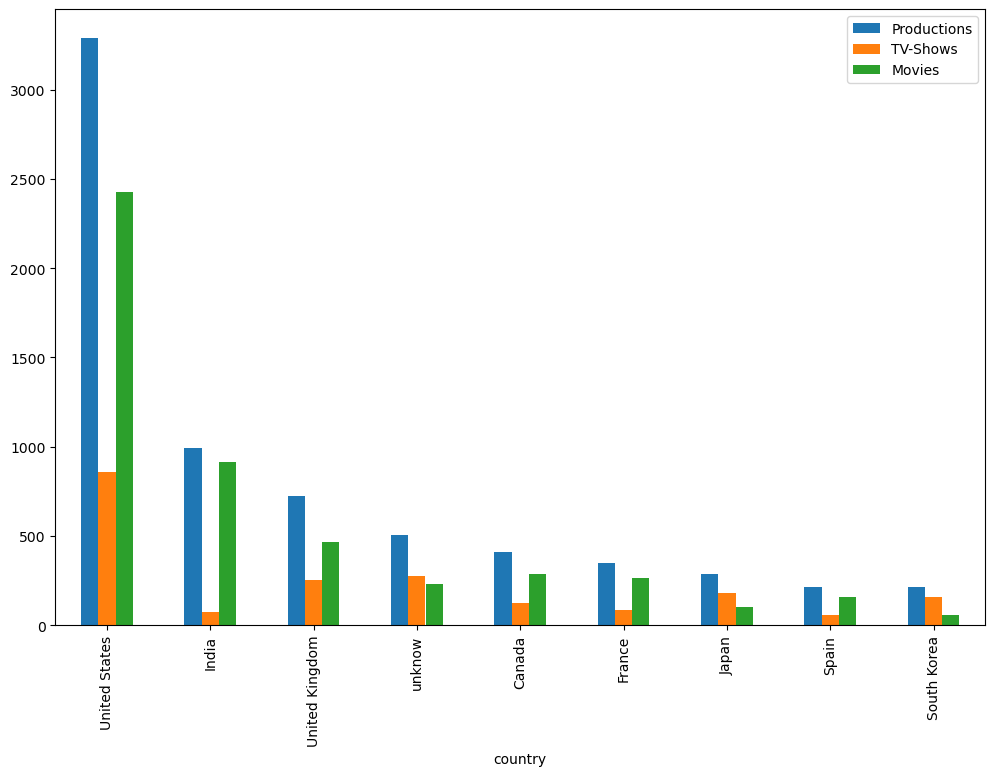

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
country_df.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar", ax=ax)

The production of TV shows and movies in the US is higher compared to other countries. While TV show production is lower in many countries, Japan and South Korea show a higher interest in producing TV shows than movies.

These insights can guide Netflix in strategizing its business according to the production trends of TV shows and movies across different countries. Such planning could potentially lead to a positive business impact by aligning content offerings with regional production preferences.

#### Correlation Heatmap

In [48]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap


country         Canada     Egypt    France     India     Japan  South Korea  \
rating                                                                        
Adults        0.446328  0.277228  0.678261  0.255688  0.366071     0.469945   
Kids          0.180791  0.000000  0.095652  0.016251  0.008929     0.027322   
Older Kids    0.225989  0.039604  0.060870  0.160347  0.272321     0.120219   
Teens         0.016949  0.000000  0.008696  0.004334  0.013393     0.000000   
Young Adults  0.129944  0.683168  0.156522  0.563380  0.339286     0.382514   

country          Spain  United Kingdom  United States    unknow  
rating                                                           
Adults        0.835821        0.512626       0.502357  0.318812  
Kids          0.022388        0.093434       0.073449  0.170297  
Older Kids    0.044776        0.204545       0.187353  0.235644  
Teens         0.007463        0.017677       0.089159  0.005941  
Young Adults  0.089552        0.171717       0.147683  0.269307

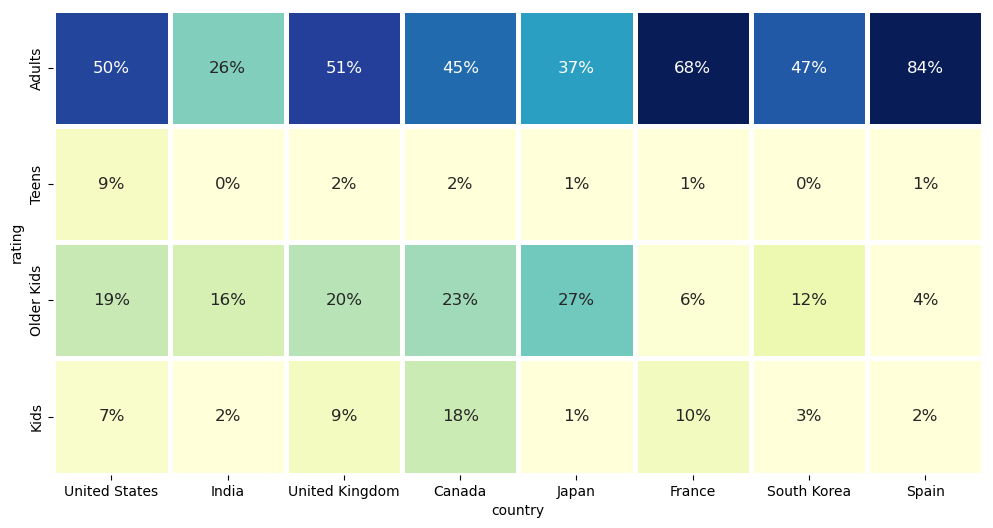

In [49]:

     # Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',]

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()
     


The US and UK have similar content targeting age groups on Netflix. Similarly, France and Spain offer comparable content catering to various age demographics on the platform.

#### Building a wordcloud for the movie descriptions

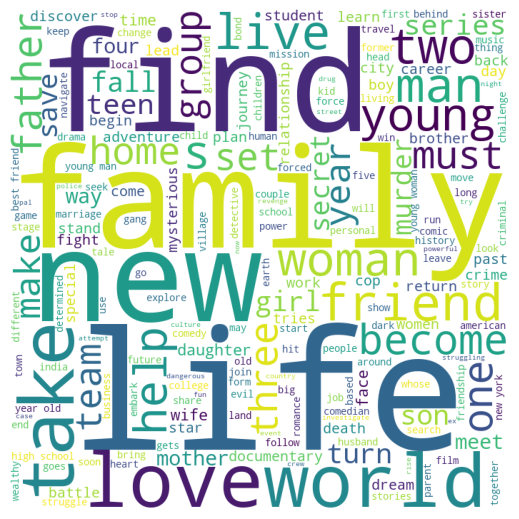

In [50]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

* Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

# Data preprocessing:

### Modelling Approach:

1.   Select the attributes based on which you want to cluster the shows
2.   Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
7. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
8. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.



We will cluster the shows on Netflix based on the following attributes:

* Director
* Cast
* Country
* Listed in (genres)
* Description

In [51]:
df1=df_1st.copy()

In [52]:
df1.fillna('',inplace=True)

In [53]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])
     

In [54]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

# Removing non-ASCII characters

In [55]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
     

In [56]:
# remove non-ascii characters
df1['clustering_attributes']= remove_non_ascii(df1['clustering_attributes'])

In [57]:

df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

# Remove stopwords and lower case:

In [58]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [59]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
     

In [60]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)
     


In [61]:
df1['clustering_attributes'][40]
     

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

# Remove punctuations

In [62]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [63]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)


In [64]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

# Lemmatization:

In [65]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
     

In [66]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [67]:
df1['clustering_attributes'][40]
     

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

# Tokenization:

In [68]:
tokenizer = TweetTokenizer()
     

In [69]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))
     

# Vectorization:

In [70]:
#We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']
     

In [71]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)
     

In [72]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 235288 stored elements in Compressed Sparse Row format>

In [73]:
# data type of vector
type(X)
     

scipy.sparse._csr.csr_matrix

In [74]:
# convert X into array form for clustering
X = X.toarray()
     

# Dimensionality reduction using PCA:

In [75]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)
     

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

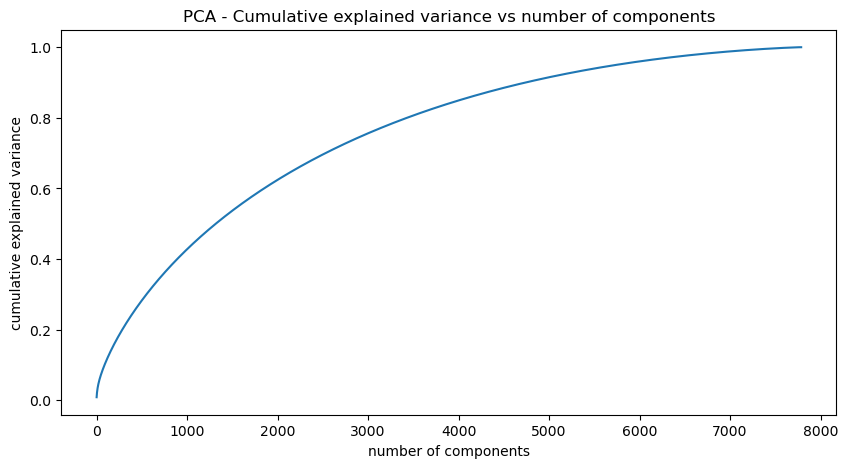

In [76]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
     

We observe that approximately 100% of the variance is explained by around 7500 components. Moreover, more than 80% of the variance can be explained by just 4000 components. Therefore, to streamline the model and reduce dimensionality, selecting the top 4000 components would suffice to capture over 80% of the variance.

In [77]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [78]:
# transformed features
x_pca = pca.transform(X)

In [79]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

* We have successfully reduced the dimensionality of data using PCA.

 # Clusters implementation:


 * Building clusters using the K-means clustering algorithm.

* Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

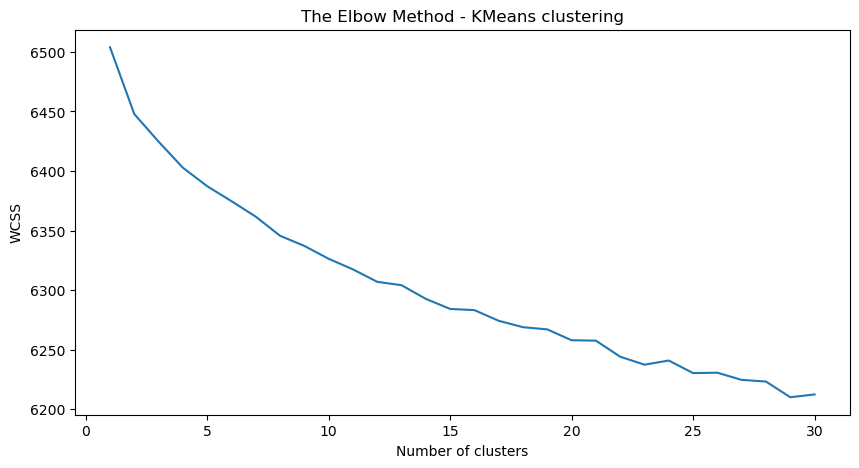

In [80]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
     

In [81]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(x_pca)
      centers = km.cluster_centers_

      score = silhouette_score(x_pca, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(x_pca) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.004590902227540783


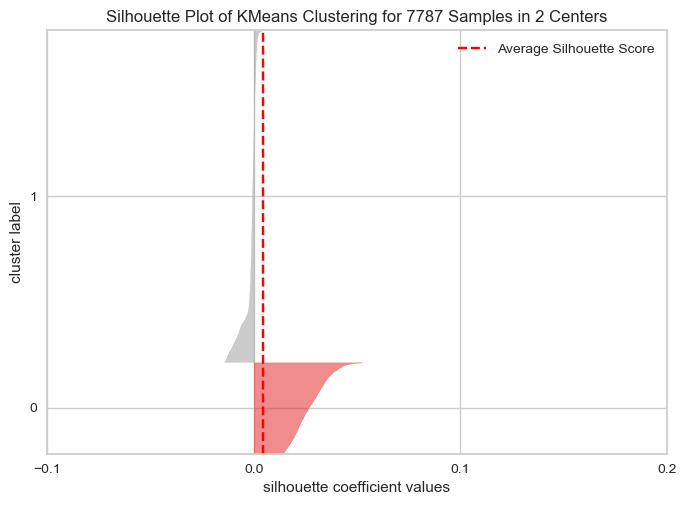

For n_clusters = 3, silhouette score is 0.005768541932886797


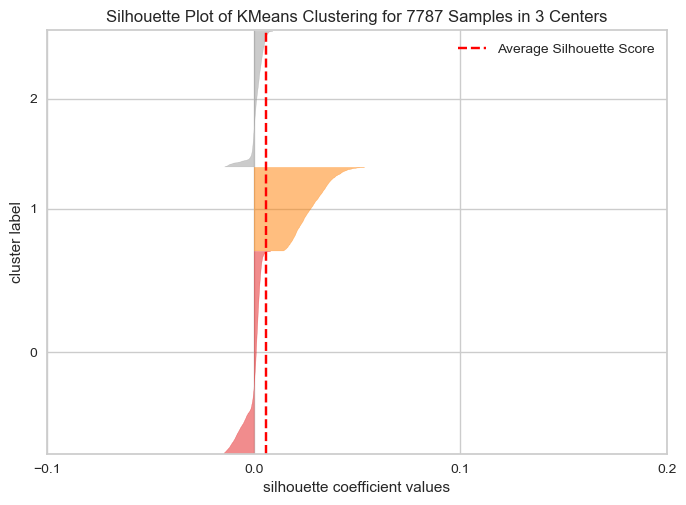

For n_clusters = 4, silhouette score is 0.007403548252242873


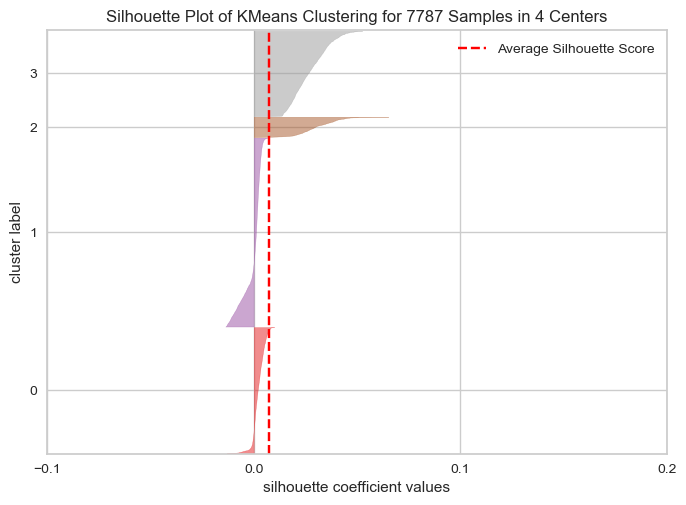

For n_clusters = 5, silhouette score is -0.0006926773436646936


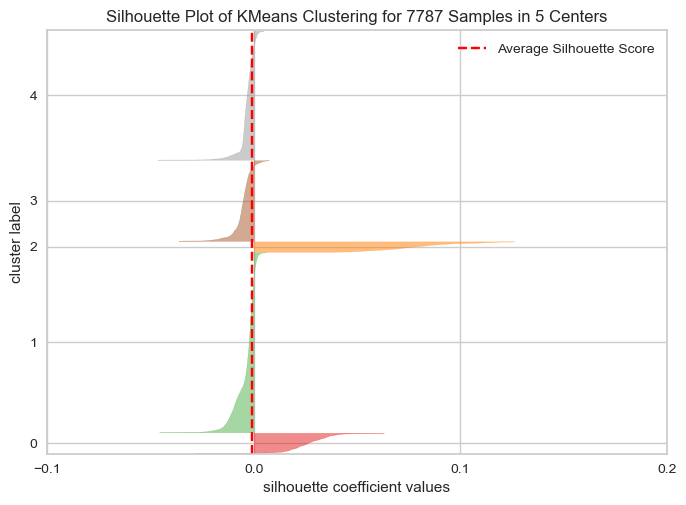

For n_clusters = 6, silhouette score is 0.008837525910530095


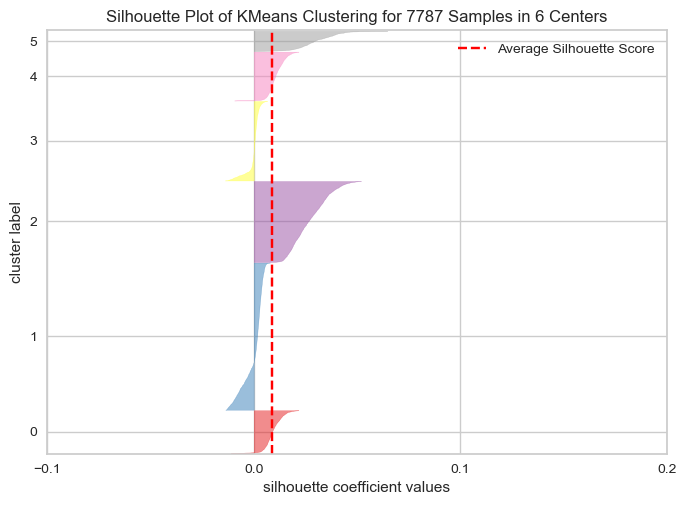

For n_clusters = 7, silhouette score is 0.0066375765613841484


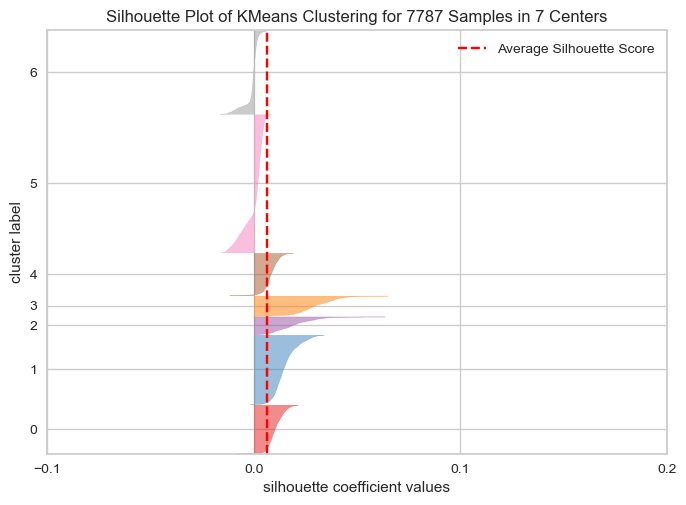

For n_clusters = 8, silhouette score is 0.007409693930127207


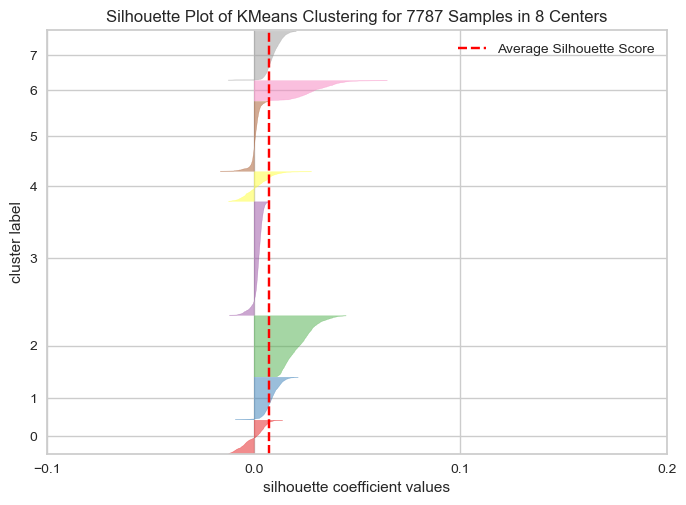

For n_clusters = 9, silhouette score is 0.0022391867937669005


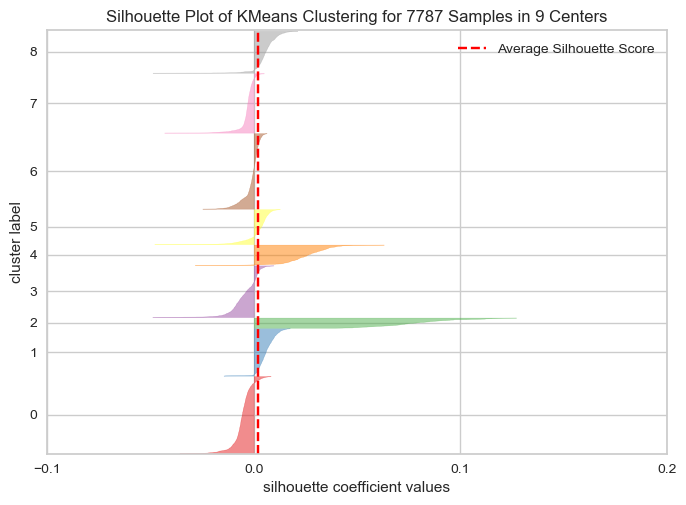

For n_clusters = 10, silhouette score is 0.0031537870527447594


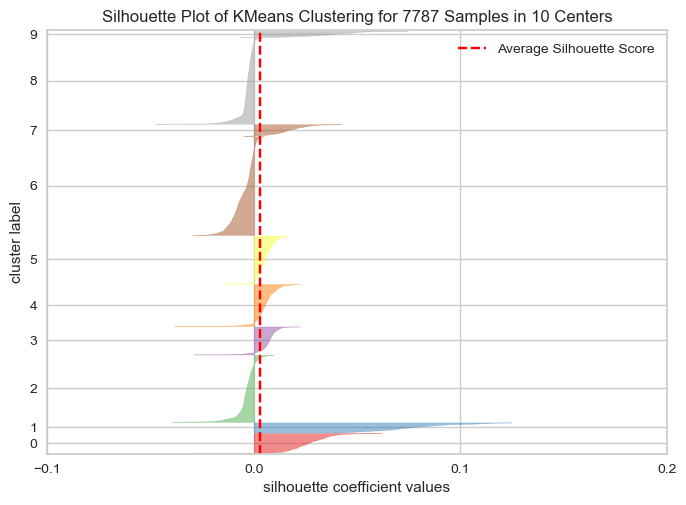

For n_clusters = 11, silhouette score is 0.003072118009925525


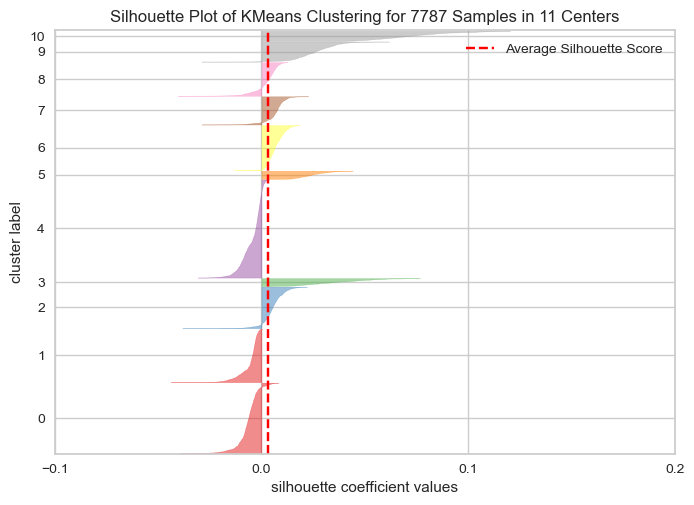

For n_clusters = 12, silhouette score is 0.003537944216198489


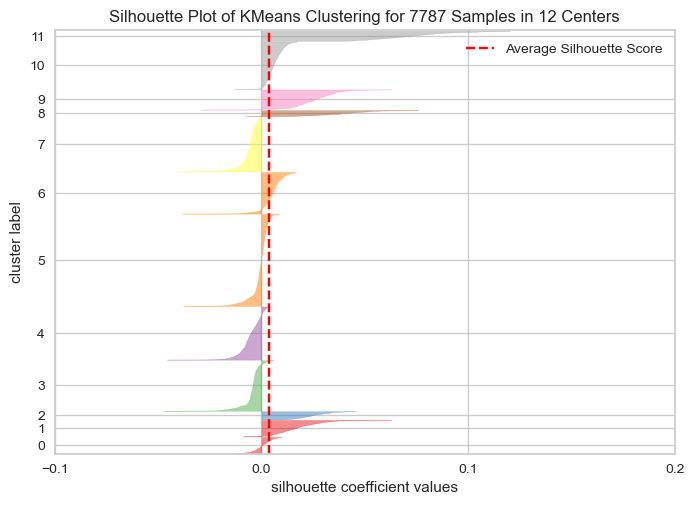

For n_clusters = 13, silhouette score is 0.004188167464418953


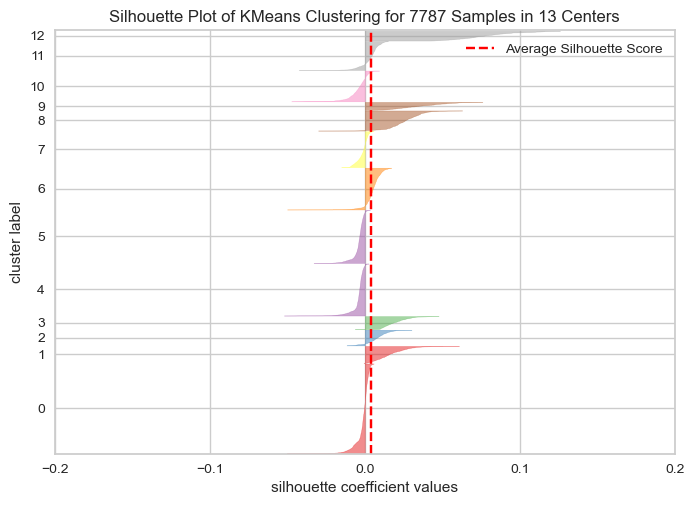

For n_clusters = 14, silhouette score is 0.004738468668148727


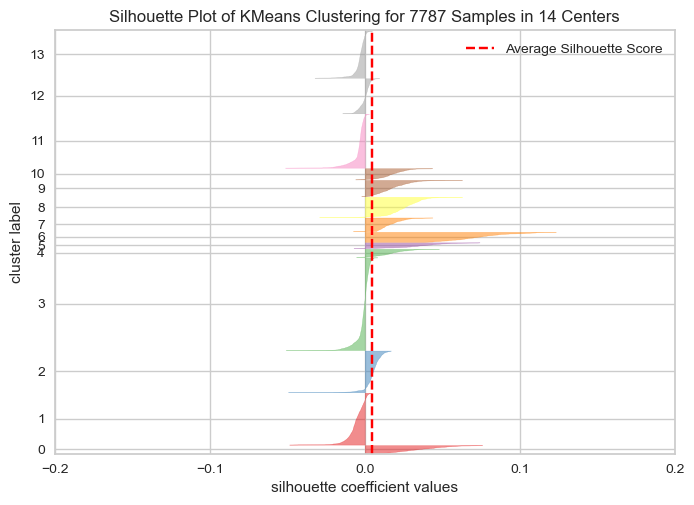

For n_clusters = 15, silhouette score is 0.005058813498765936


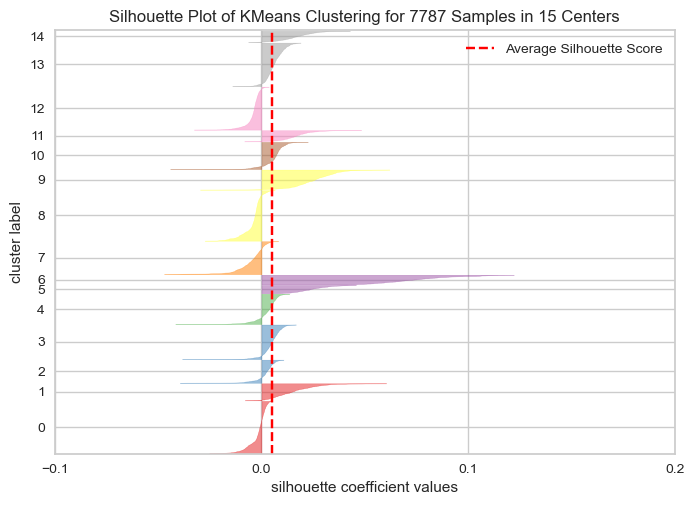

For n_clusters = 16, silhouette score is 0.005352993546215799


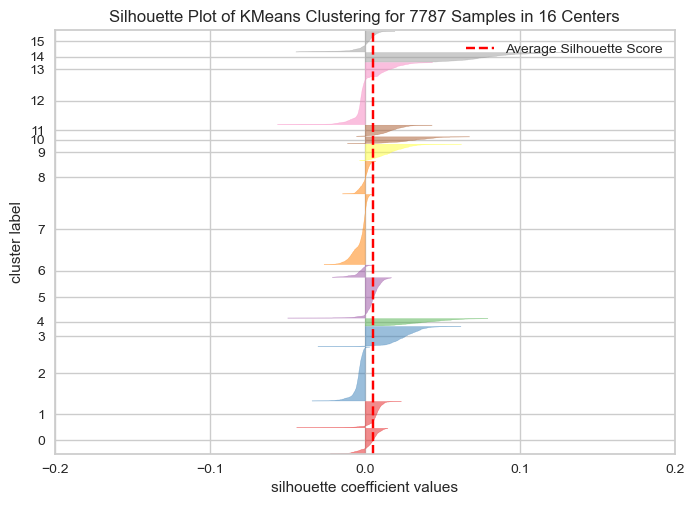

For n_clusters = 17, silhouette score is 0.004766936275937998


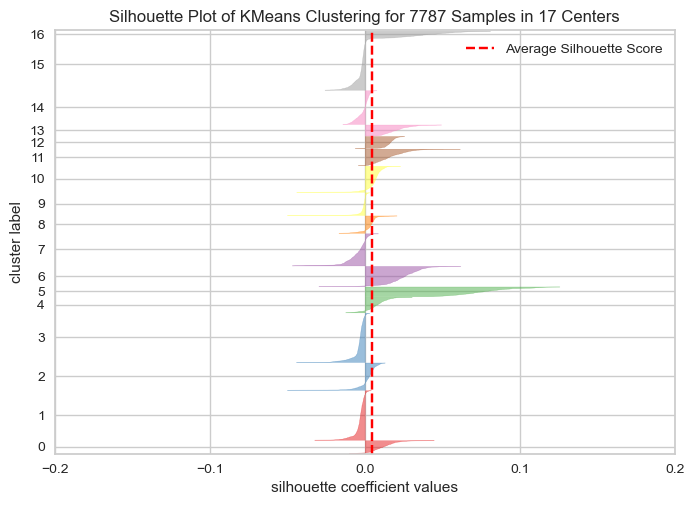

For n_clusters = 18, silhouette score is 0.006324246534065674


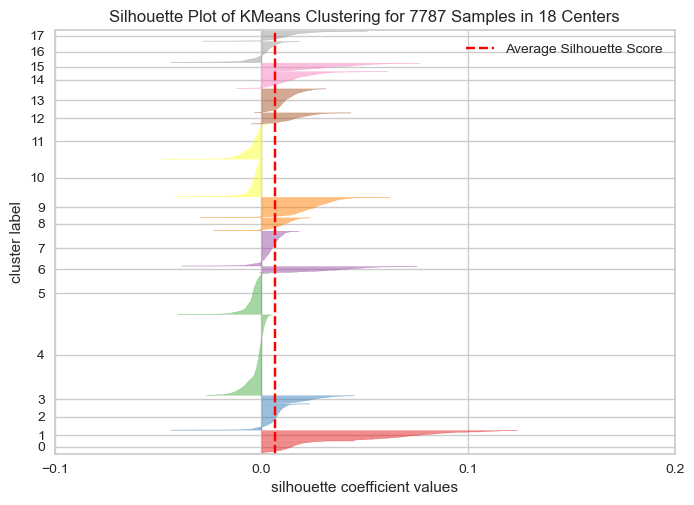

For n_clusters = 19, silhouette score is 0.004908609358439094


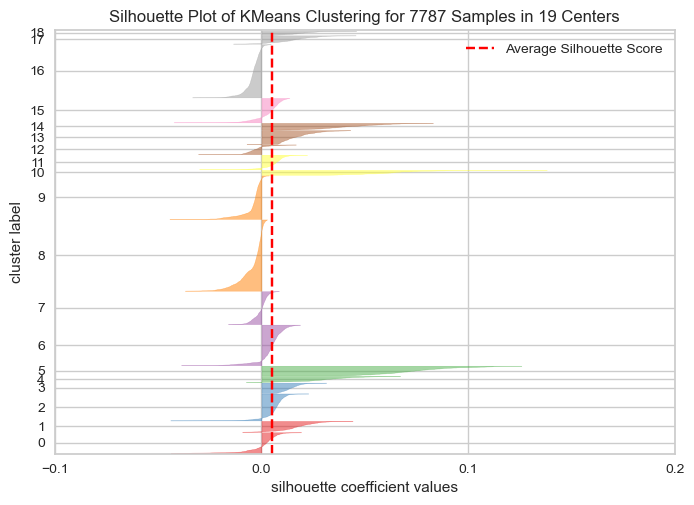

For n_clusters = 20, silhouette score is 0.006477657016441097


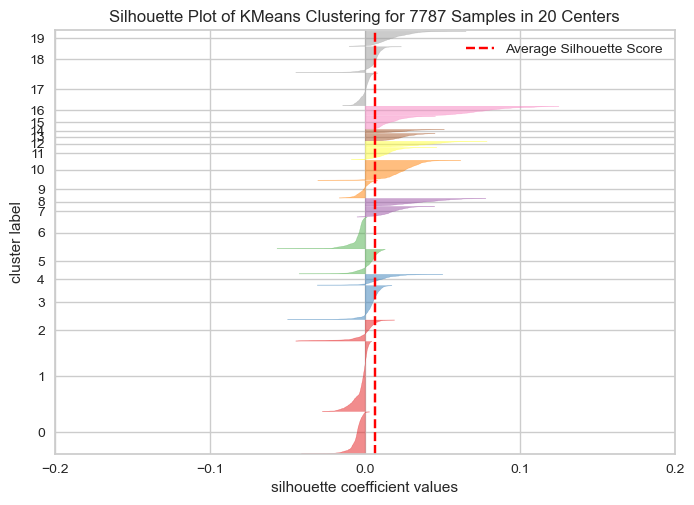

For n_clusters = 21, silhouette score is 0.006469704156755718


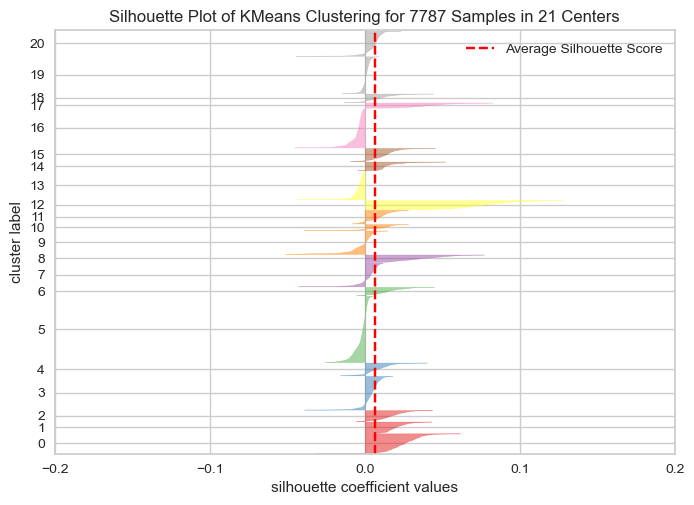

In [82]:
silhouette_score_analysis(22)

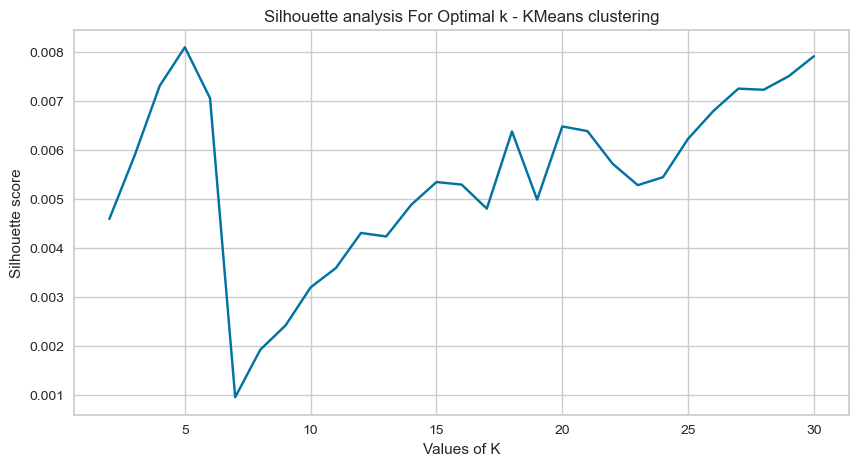

In [83]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()
     

* The highest Silhouette score is obtained for 6 clusters.

In [84]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [85]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6374.661586685407, 0.00705236273831118)


In [86]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

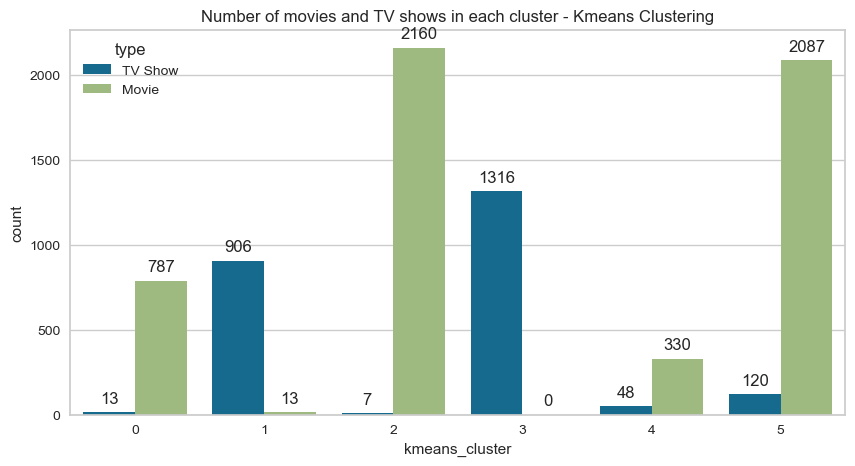

In [87]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

* Successfully built 6 clusters using the k-means clustering algorithm.

#### Building wordclouds for different clusters built:

In [88]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
     


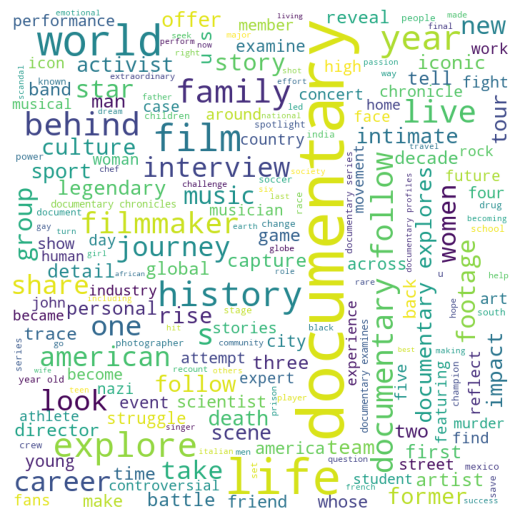

In [89]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

* Keywords observed in cluster 0: life, new, family, friend, save, help, discover, home, teen.

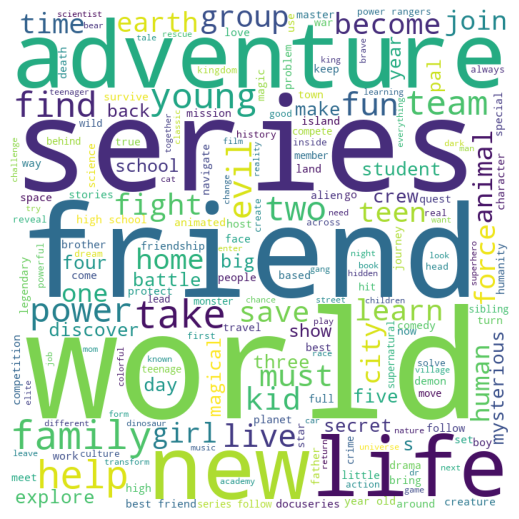

In [90]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

* Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter.

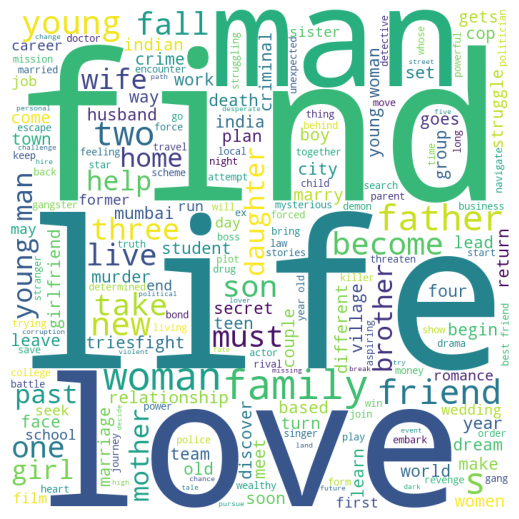

In [91]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

* Keywords observed in cluster 2: young, world, girl, mysterious, humanity, life, student, school, battle, demon, force

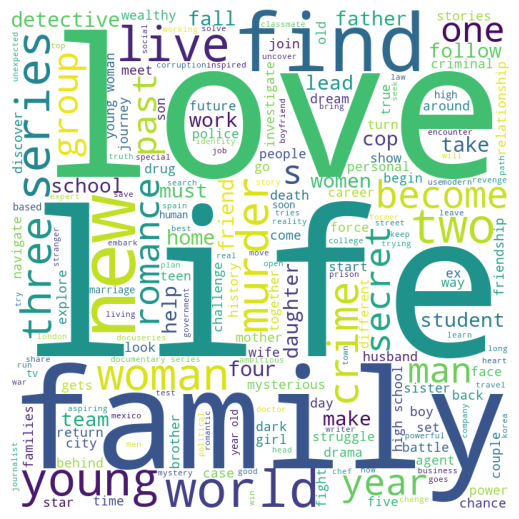

In [92]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

* Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure.

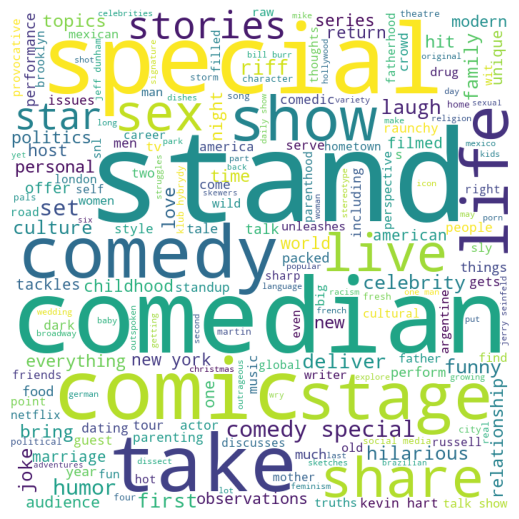

In [93]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

* Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke

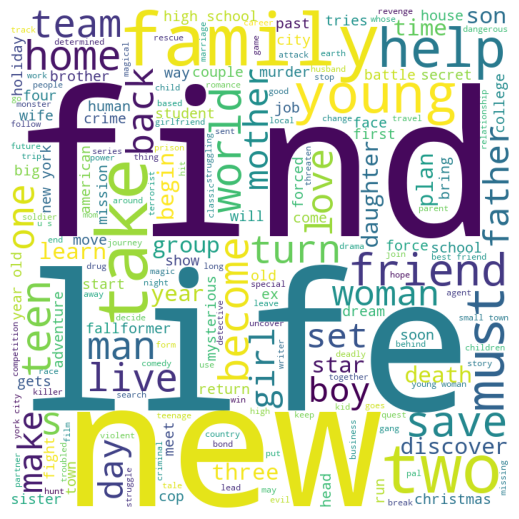

In [94]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

* Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life.

# Hierarchical clustering:

Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

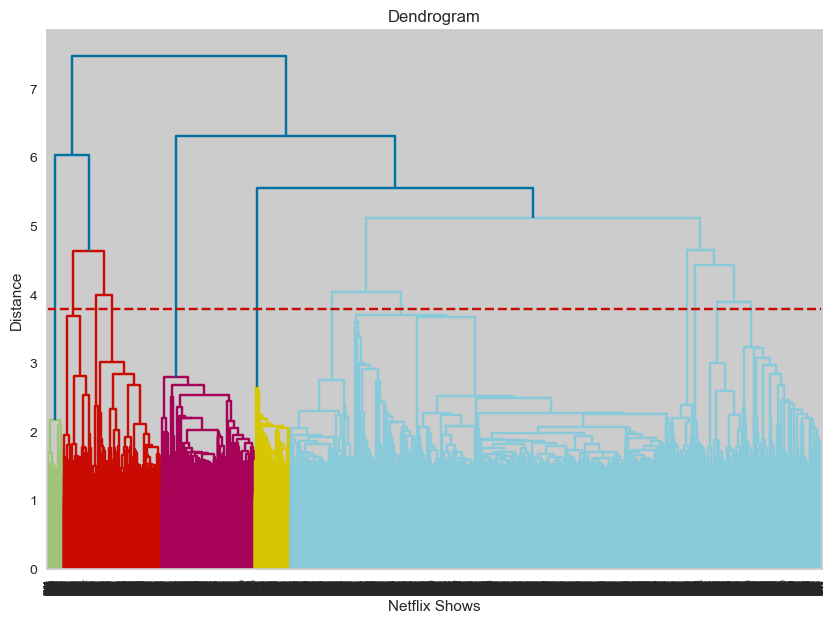

In [95]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')
    

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

Building 12 clusters using the Agglomerative clustering algorithm:

In [96]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([3, 5, 1, ..., 4, 2, 4], dtype=int64)

In [97]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

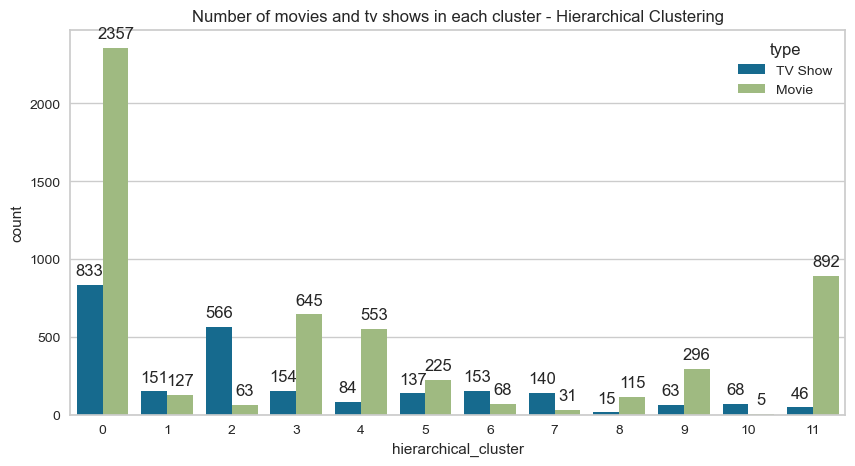

In [98]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

* Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

# Fitting hierarchical clustering model
     

In [99]:
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([3, 5, 1, ..., 4, 2, 4], dtype=int64)

In [100]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

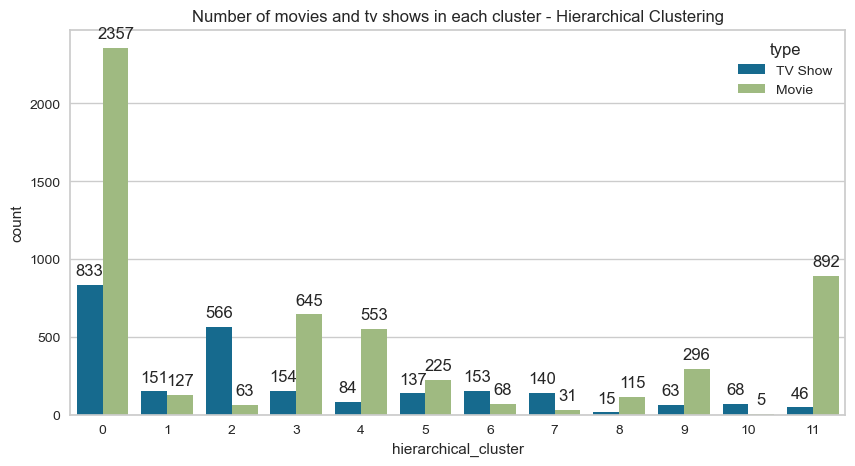

In [101]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     


* Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

# Building wordclouds for different clusters built:

In [102]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
     

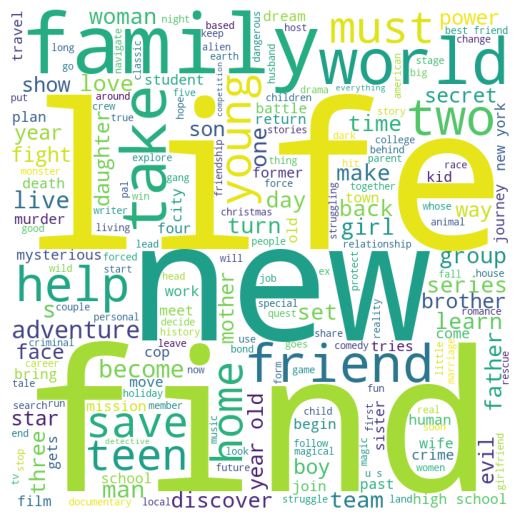

In [103]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)
     

* Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure

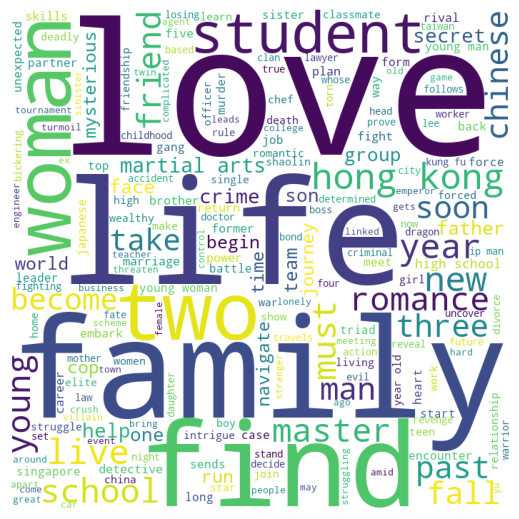

In [104]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

* Keywords observed in cluster 1: love, family, life, student, romance, school, woman, master, father

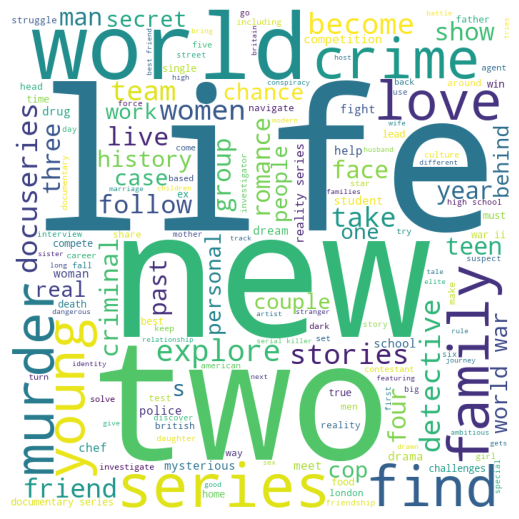

In [105]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective

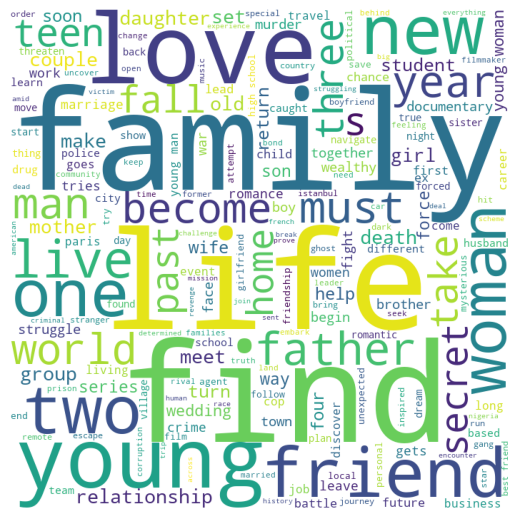

In [106]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

* Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret

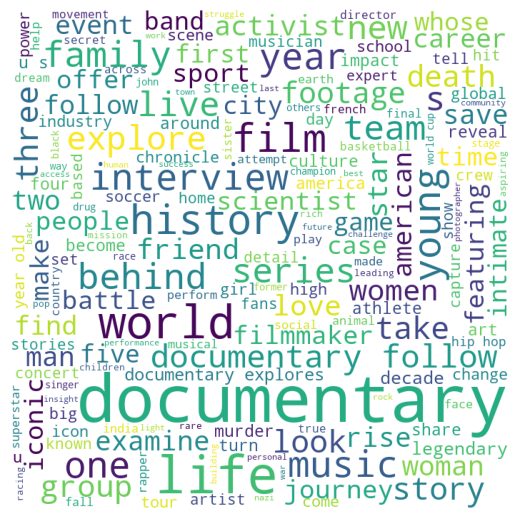

In [107]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

* Keywords observed in cluster 4: documentary, music, world, team, interview,history, family, career, battle, death

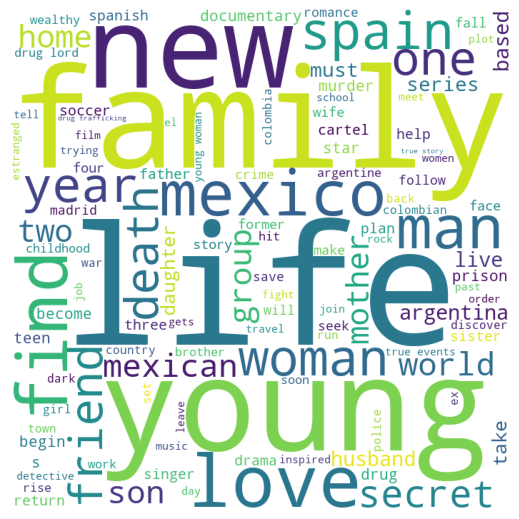

In [108]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

* Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer

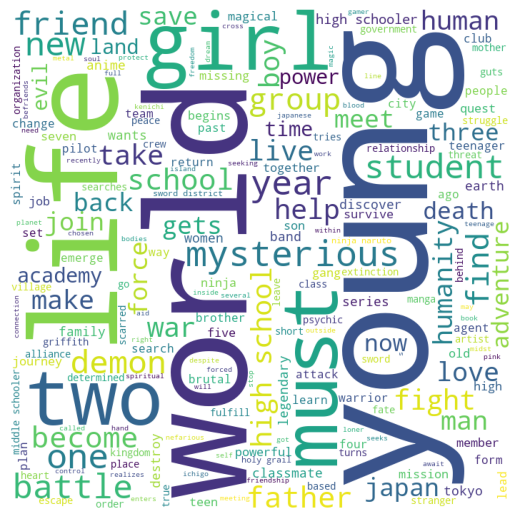

In [109]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

* Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father



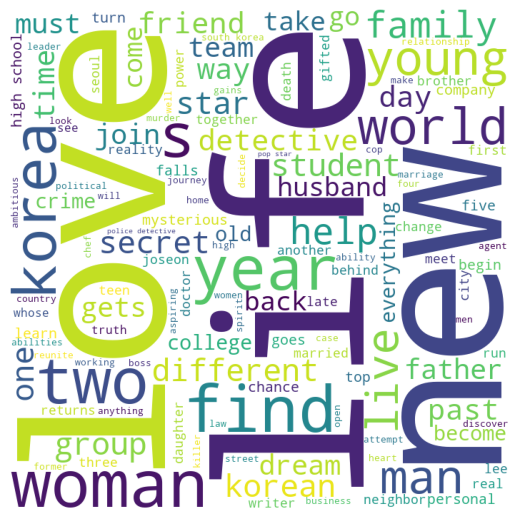

In [110]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

* eywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young

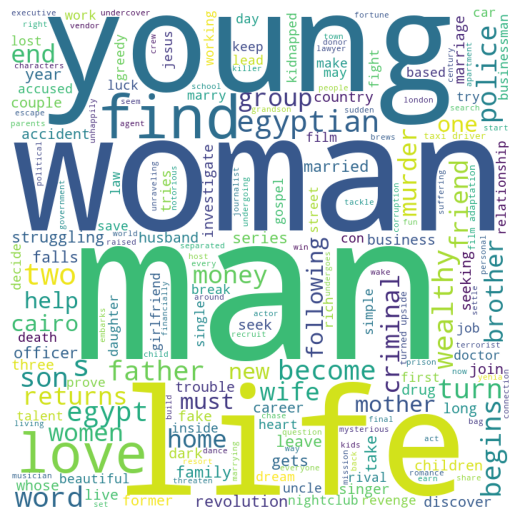

In [111]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

* Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling

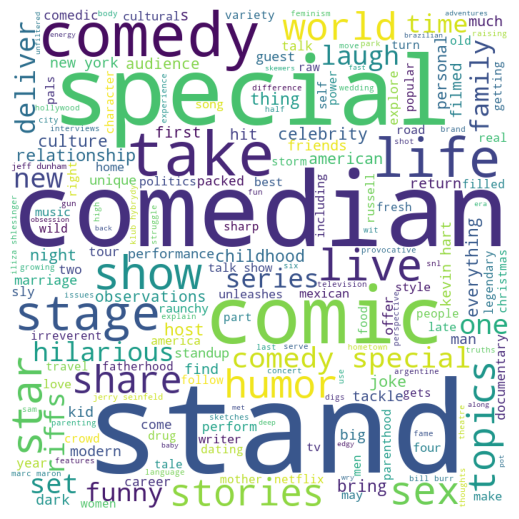

In [112]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

* Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories

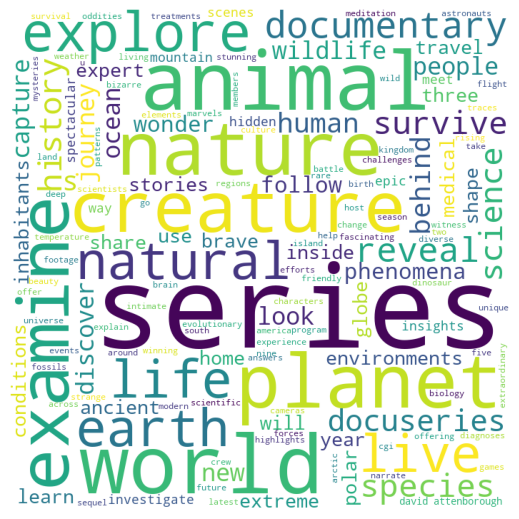

In [113]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

* Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth

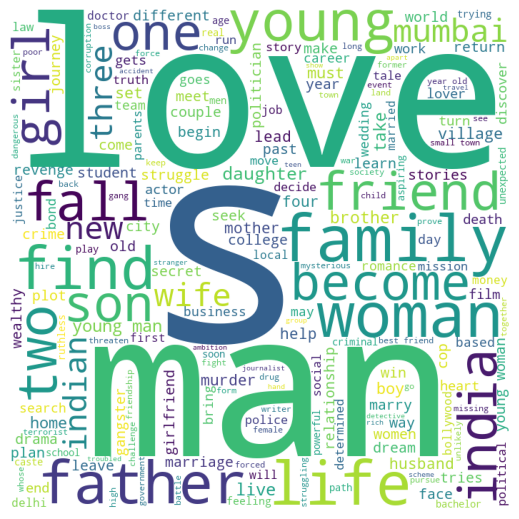

In [114]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

* Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young

#  Content based recommender system:

* We can build a simple content based recommender system based on the similarity of the shows.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
* To get the similarity score of the shows, we can use cosine similarity
* The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.
 


In [115]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [116]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index
     

In [117]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [118]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)
     

In [119]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])
     


In [120]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)
     


In [121]:
cosine_similarity.shape
     

(7787, 7787)

In [122]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'
     

In [123]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['Mr. Sunshine',
 'One Spring Night',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'My Little Baby',
 'Reply 1994',
 'Extracurricular',
 'My Secret Romance',
 'Chef & My Fridge']

In [124]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Scream',
 'Warrior Nun',
 'Nightflyers',
 'Zombie Dumb',
 'Kiss Me First',
 'The Vampire Diaries']

In [125]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'My Hotter Half',
 'The Murder Detectives',
 'I AM A KILLER: RELEASED']

In [126]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'Jack Taylor',
 'Better Call Saul',
 'Dramaworld',
 'Father Brown',
 "Marvel's Iron Fist",
 'Young Wallander',
 'No Good Nick']

In [127]:
# Recommendations for 'ye jawani ye diwani'
recommend_10('ye jawani ye diwani')
     

'Invalid Entry'

* invalid because the show 'ye jawani ye diwani' is not available on Netflix.

# **Conclusion**



- **Key Findings from EDA:**
  Netflix hosts more movies than TV shows, with the total number of shows increasing significantly over time.The majority of shows were produced in the United States, catering predominantly to adult and young adult audiences.

- **Clustering Approach:**
  We decided to cluster the data based on attributes such as director, cast, country, genre, and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

- **Feature Engineering:**
  Using TFIDF Vectorization, we generated 20,000 attributes.

- **Dimensionality Reduction:**
  Principal Component Analysis (PCA) was applied to reduce dimensionality. We found that 4,000 components captured over 80% of the variance, so we limited the components to 4,000.

- **Clustering Algorithms:**
  K-Means Clustering: Utilized the elbow method and Silhouette score analysis to determine an optimal number of 6 clusters. Agglomerative Clustering: Employed dendrogram visualization to identify 12 optimal clusters.

- **Content-Based Recommender System:**
  We developed a content-based recommender system using cosine similarity. This system provides 10 recommendations based on the type of show a user has watched.
